## TP noté à déposer aux formats .ipynb et .pdf sur moodle jusqu'au mardi 28 mars 17h

Nom : 

Prénom : 

Le rapport de TP sous forme d’un fichier .ipynb et d’un fichier .pdf sera déposé sur moodle. Ces fichiers doivent contenir tous vos codes, vos sorties graphiques et/ou numériques si pertinentes et les commentaires de vos sorties. vOus pouvez rajouter autant de cellules que vous le souhaitez, que ce soient des cellules de codes ou de texte (Markdown).

Le but de ce TP est de faire une analyse descriptive d’un jeu de données des résultats de l'épreuve d'heptathlon féminin aux Jeux Olympiques de Tokyo en 2020. L'heptathlon est une combinaison de 7 épreuves d'athlétisme : 100m haies, saut en hauteur, lancer de poids, 200m, saut en longueur, lancer de javelot et 800m. Pour calculer le score et le classement final, les temps ou longueurs obtenus sont convertis en points. Le fichier hepta.csv contient les points obtenus à chaque épreuve pour chaque participante ainsi que le total.

Récupérez le fichier hepta.csv sur la page moodle du cours et sauvegardez-le dans votre répertoire de travail. Vous aurez besoin des librairies suivantes.

In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [12]:
##On reféfinit les fonctions usuelles parce que yolo!

def Var(y):
    n = len(y)
    return sum((i - np.mean(y))**2 for i in y) / (n-1)

def Cov(x,y):
    n = len(y)
    return sum((y[i] - np.mean(y))*(x[i] - np.mean(x)) for i in range(n)) / (n-1)

def computeCoefs(x,y):

    B1 = Cov(x,y)/ Var(x)

    return (np.mean(y) - (B1 * np.mean(x)),
           B1)

def scTot(x, y):
    return (len(y)-1) * Var(y)

def scReg(x, y):

    B0, B1 = computeCoefs(x, y)
    yp = B1*x + B0

    return sum(
    (yp[i] - np.mean(y))**2
    for i in range(len(y)))

def DetCoef(x, y):
    return (scReg(x,y)) / (scTot(x,y))

Importez le jeu de données via la commande

In [13]:
hepta = pd.read_csv('hepta.csv', sep=';',decimal=',')
hepta

,Prenom,Nom,Pays,Points,100mhaies,Hauteur,Poids,200m,Longueur,Javelot,800m
0,Nafissatou,Thiam,Belgique,6791,1044,1132,849,896,1040,951,879
1,Anouk,Vetter,Pays-Bas,6689,1111,978,880,999,997,883,841
2,Emma,Oosterwegel,Pays-Bas,6590,1071,978,746,957,940,949,949
3,Noor,Vidts,Belgique,6571,1099,1016,816,1010,949,702,979
4,Kendell,Williams,Etats-Unis,6508,1129,978,688,981,1030,836,866
5,Annie,Kunz,Etats-Unis,6420,1052,978,871,969,949,721,880
6,Carolin,Schafer,Allemagne,6419,1081,978,793,949,783,940,895
7,Ivona,Dadic,Autriche,6403,1034,1016,801,949,883,829,891
8,Erica,Bougard,Etats-Unis,6369,1103,1054,707,973,868,794,880
9,Zheng,Ninali,Chine,6318,1084,978,764,928,887,717,960


### Description du jeu de données

#### 1 - Examiner le jeu de données. Combien y a-t-il d'individus ? Combien de variables quantitatives ? 

In [14]:
nb_qualitatives = 3
nb_individus = hepta.shape[0]

print("nombre de variables qualitatives: ", nb_qualitatives)
print("nombre de variables quantitatives: ", hepta.shape[1]- nb_qualitatives)
print("nombre d'individus: ", nb_individus)

nombre de variables qualitatives:  3
nombre de variables quantitatives:  8
nombre d'individus:  20


#### 2 - Représenter graphiquement dans la même fenêtre les boîtes à moustaches des 7 épreuves de l'heptathlon.

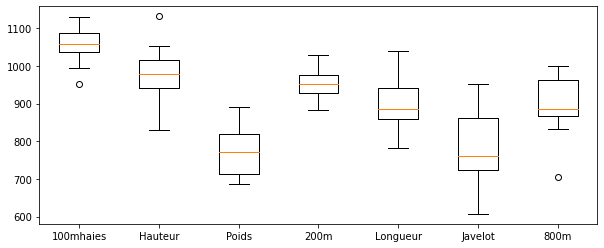

In [15]:
epreuves = hepta.iloc[:, 4::]

plt.boxplot(epreuves, labels = epreuves.columns.values)
plt.rcParams["figure.figsize"] = (10,4) #aggrandit un peu la figure.
#Cette commande semble parfois causer des comportements instable.
#Si un graphe apparait en tout petit, relancer la cellule du graphe en question.


plt.plot()
pass

#### 3 - Quelle épreuve a l'étendue maximale ?

In [16]:
m = -1
name = ""
for i in epreuves.columns.values:
    c = epreuves[i]
    if (sp := (max(c) - min(c))) > m:
        m = sp
        name = i
print(name, m)

Javelot 344


On voit que c'est le javelot avec une étendue de 344

#### 4 - Quelle épreuve a la plus grande moyenne ? la plus grande variance ?

In [17]:
m = -1 #suffisant comme minorant
name
for i in epreuves.columns.values:
    c = epreuves[i]
    if (sp := np.mean(c)) > m:
        m = sp
        name = i
print(name, m)


v = -1
name
for i in epreuves.columns.values:
    c = epreuves[i]
    if (sp := Var(c)) > m:
        m = sp
        name = i
print(name, m)


100mhaies 1057.05
Javelot 10095.776315789473


Pour la moyenne, c'est le 100m haies avec 1057

Pour la variance, c'es le javelot, avec 10096.

### Analyse de la liaison entre les épreuves de Lancer de Javelot et du 800m

#### 5 -  Extraire du tableau de données les variables Javelot et 800m.

In [18]:
dat_javelot = np.array(epreuves["Javelot"])
dat_800m = np.array(epreuves["800m"])


#### 6 - Calculer les coefficients de la droite de régression du score au 800m en fonction du score au Javelot

In [19]:


B0, B1 = computeCoefs(dat_javelot, dat_800m)

pass


#### 7 - Tracer le nuage des points du score au 800m en fonction du score au Javelot et superposer la droite de régression 

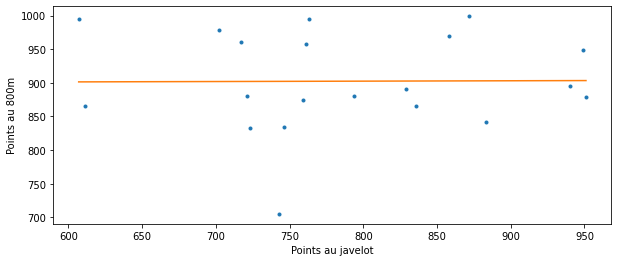

In [20]:

#On crée un vecteur x avec 2 points, ce qui est suffisant mais on peut en mettre plus si on veut.
x = np.linspace(min(dat_javelot), max(dat_javelot), 2)

y = B1*x + B0
plt.plot(dat_javelot, dat_800m, '.')
plt.plot(x, y)

plt.xlabel("Points au javelot")
plt.ylabel("Points au 800m")

plt.show()

#### 8 - Evaluer la qualité de l’ajustement et commenter.

In [21]:

print("qualité de l'ajustement: ", DetCoef(dat_javelot, dat_800m))

qualité de l'ajustement:  5.980596309546486e-05


La qualité de l'ajustement ($\frac {SC_{reg}} {SC_{tot}}$) est très proche de 0, donc très loin de 1, donc la qualité de l'ajustement est tout bonnement minable.

### Analyse en composante principale

#### 9 - Extraire le tableau des score des 7 épreuves (sans le score total), centrer et réduire les données et lancer l'ACP

In [22]:


scaler = StandardScaler()

scaler.fit (epreuves)

Z = scaler.transform(epreuves)



pca = PCA()

pca.fit(Z)

F = pca.fit_transform(Z)

#### 10 - Examiner les valeurs propres. Quel est le pourcentage de variance expliquée par les deux premiers axes ? Combien d'axes faudrait-il garder pour expliquer 90% de la variabilité des données ?

In [23]:


eig = np.array(
    [ np.var(F[: ,k]) for k in range(len(F[0]))]
)

I = pca.explained_variance_ratio_


print("valeurs propres: ", eig)

print("variance expliquée par composante: ", I)

print("variance expliquée cumulée: ", np.cumsum(I))


valeurs propres:  [2.00522286 1.61251886 1.1858076  0.91975309 0.6162108  0.41946331
 0.24102348]
variance expliquée par composante:  [0.28646041 0.23035984 0.16940109 0.1313933  0.08803011 0.05992333
 0.03443193]
variance expliquée cumulée:  [0.28646041 0.51682025 0.68622133 0.81761463 0.90564474 0.96556807
 1.        ]


Environ 52% de la variance est expliquée par les deux premiers axes.
Il faudrait garder 5 axes pour expliquer 90% de la variabilité des données. Trois valeurs propres dépassent 1.

#### Dans toute la suite on ne gardera que les deux premiers axes.

#### 11 - Extraire les facteurs

In [24]:
Gn = pca.components_

G = np.array([ Gn [0 ,:] * np.sqrt(eig[0]),
              Gn[1,:]*np.sqrt(eig[1])]
            )

#### 12 - Tracer le cercle des corrélation dans le premier plan factoriel pour les variables

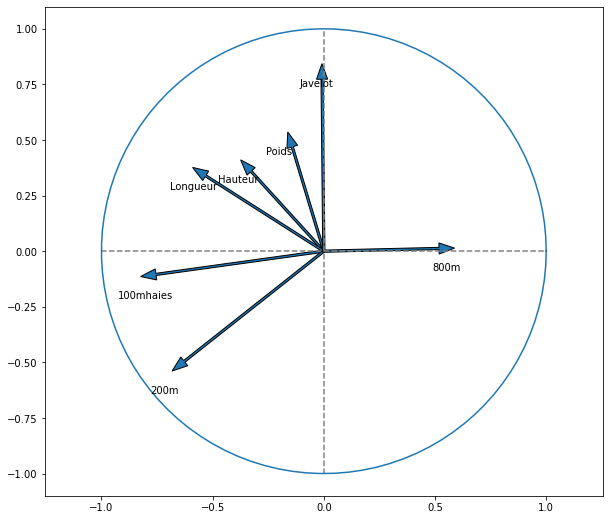

In [25]:
fig, ax = plt.subplots(figsize = (10,9))
for i in range(0,  Gn.shape[1]):
    ax.arrow(0, 0, 
             G[0, i], 
             G[1, i],
            head_width = 0.05, 
            head_length = 0.07, 
            width = 0.01, length_includes_head = 1
            )
    plt.text(G[0, i] - 0.1, 
             G[1, i] - 0.1,
             epreuves.columns[i]
            )

plt.plot([-1, 1], [0, 0], color = 'grey', ls = '--')
plt.plot([0, 0],[-1, 1], color = 'grey', ls = '--')


an = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
pass

#### Examiner le cercle des corrélations dans le premier plan factoriel des variables

#### 13 - Commentez les positions respectives des variables 800m et Javelot dans ce plan.

Les vecteurs de ces deux variables sont presque orthogonaux. Ce qui veut dire que les variables *800m* et *Javelot* sont très peu correllées.

Cela est cohérent avec la faible qualité de l'ajustement qu'on a fait précédemment. Le talent au 800m n'a aucun rapport avec le talent au javelot.

En outre, *800m* est presque colinéaire au piremier axe, et *Javelot*, au second.

#### 14 - Commentez les positions respectives des variables 800m et 100mhaies dans ce plan.

Les vecteurs de ces deux variables sont presque opposés et elles sont en grande partie représentées par le premier axe factoriel.

Cela veut dire que les athlètes bons au *800m* ont tendance à être plus mauvais au *100m haies*, et vis-versa.

#### 15 - Les variables Poids et Hauteur sont-elles bien représentées dans ce plan ?

Les variables *Poids* et *Hauteur*, mais aussi *800m* et *Longueur* ne sont pas très bien représentées (leur module sur ce plan factoriel est environ égal à $\frac 1 2$), ce qui, selon nos critère, peut être insuffisant.

#### 16 - Extraire les composantes principales

In [26]:
F = pca.fit_transform(Z)

#### 17 - Tracer le nuage de point des individus projetés dans le premier plan factoriel.

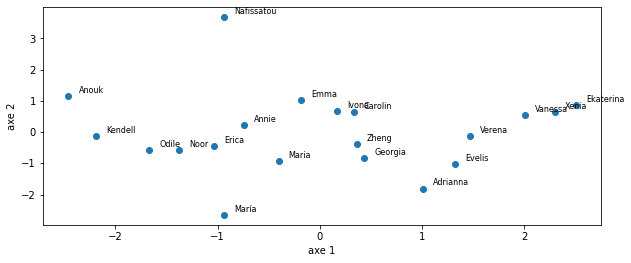

In [27]:
fig, ax = plt.subplots()
ax.scatter(F[:, 0], F[:, 1])
for i, label in enumerate(hepta['Prenom']):
    ax.text(F[i, 0] + 0.1, F[i, 1]+0.1, label, fontsize=8)


ax.set_xlabel('axe 1')
ax.set_ylabel('axe 2')
pass

#### Examiner la projection des individus dans le premier plan factoriel

#### 18 - Commentez la position de Nafissatou Thiam dans le premier plan factoriel.

Si l'on en croit notre plan factoriel des variables, Nafissatou Thiam est très forte (la meilleure, de loin) au javelot (axe des ordonnées).

#### 19 - Commentez la position d'Ekaterina Voronina, Xenia Krizsan et Vanessa Rimm dans le premier plan factoriel.

Les trois sont tout à droite du graphe et vers le milieu de l'axe des ordonnées. On en déduit que leur discipline prédiléction est le 800m. (ce sont les trois meilleures, dans cet ordre.)

#### 20 - Commentez la position d'Anouk Vetter dans le premier plan factoriel.

Anouk Vetter est tout à gauche, et dans la moitié haute du diagramme. C'est la meilleure en ce qui concerne le 100m haie.

Quand vous avez terminé, sauvegardez votre fichier au format .ipynb et exportez-le au format .pdf. Déposez les deux fichiers sur moodle.